# Exploratory Data Analysis Exercise with Pandas and Matplotlib

In this exercise, you are responsible for devleoping a data pipeline to ingest and analyze multi-state streamflow records from CSV files in our Canvas Class. This exercise will directly assist with HW #1. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

You will download the data from Canvas and load it into a folder you create called "streamflow_data". Once within the repo, you will load the data into this python notebook and perform exploratory data analysis. After performing data cleaning and time-series alignment with Pandas, you will transition develop Matplotlib visualizations. The core of the assignment emphasizes the Matplotlib philosophy, challenging you to use powerful operators to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming.

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. Using this siteid, find the site data in the Canvas NWIS_Streamflow data folder, download it to your computer, then upload it to this repo into a folder named "streamflow_data". In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#Site below reservoir weber below echo, 10132000
reservoir_site = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1566670/hydroinformatics/CommunicatingData-Plotting/Matplotlib/streamflow_data/10132000_1980_2020.csv')
# print(reservoir_site.head())
# print(reservoir_site.describe())
#Site headwater catchment, weber near Oakley, 10128500
headwater_site = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1566670/hydroinformatics/CommunicatingData-Plotting/Matplotlib/streamflow_data/10128500_1980_2020.csv')
# print(headwater_site.head())
# print(headwater_site.describe())
#GSL terminates, weber at gsl 10141000
GSL_site = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1566670/hydroinformatics/CommunicatingData-Plotting/Matplotlib/streamflow_data/10141000_1980_2020.csv')
# print(GSL_site.head())
# print(GSL_site.describe())

def date(df):
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    return df

reservoir_site = date(reservoir_site)
headwater_site = date(headwater_site)
GSL_site = date(GSL_site)

def remove_outliers(df):
    df = df[df['USGS_flow'] > 0]
    df = df.dropna(subset=['USGS_flow'])
    df = df[df['USGS_flow'] != -999]
    return df

reservoir_site = remove_outliers(reservoir_site)
headwater_site = remove_outliers(headwater_site)
GSL_site = remove_outliers(GSL_site)

print(reservoir_site.columns.tolist())
print(headwater_site.describe())
print(GSL_site.describe())

['Datetime', 'USGS_flow', 'variable', 'USGS_ID', 'measurement_unit', 'qualifiers', 'series']
                            Datetime    USGS_flow     USGS_ID  series
count                           9817  9817.000000      9817.0  9817.0
mean   2004-05-11 06:55:51.003361408   223.880842  10128500.0     0.0
min              1986-10-02 00:00:00    23.125000  10128500.0     0.0
25%              1995-07-01 00:00:00    62.500000  10128500.0     0.0
50%              2004-07-28 00:00:00   103.035710  10128500.0     0.0
75%              2013-06-28 00:00:00   185.906250  10128500.0     0.0
max              2020-09-29 00:00:00  2925.520800  10128500.0     0.0
std                              NaN   325.184763         0.0     0.0
                            Datetime     USGS_flow     USGS_ID   series
count                          11489  11489.000000     11489.0  11489.0
mean   2004-08-18 15:10:42.040212224    328.125434  10141000.0      0.0
min              1986-10-01 00:00:00      3.957083  10141000.

## Task 2: Slicing and Dicing

We are interested in examining the data from 2000-2010. Slice the data accordingly and save it to a new Pandas DataFrame.

In [87]:

def drop_datetime(df):
    df.set_index('Datetime', inplace=True, drop=True)
    df = df['2000-01-01':'2010-12-31']
    return df

sliced_reservoir_site = drop_datetime(reservoir_site)
slicedheadwater_site = drop_datetime(headwater_site)
sliced_GSL_site = drop_datetime(GSL_site)


# print(sliced_reservoir_site.head())
# print(slicedheadwater_site.head())
# print(sliced_GSL_site.head())
#These have varying start times

#Drop unused columns
def drop_columns(df):
    df.drop(columns=['variable','USGS_ID','measurement_unit','qualifiers','series'], inplace=True)
    return df

sliced_reservoir_site = drop_columns(sliced_reservoir_site)
slicedheadwater_site = drop_columns(slicedheadwater_site)
sliced_GSL_site = drop_columns(sliced_GSL_site)

print(sliced_reservoir_site.head())
print(slicedheadwater_site.head())
print(sliced_GSL_site.head())


            USGS_flow
Datetime             
2000-01-01  168.93750
2000-01-02  250.79167
2000-01-03  249.12500
2000-01-04  152.65625
2000-01-05  137.34375
            USGS_flow
Datetime             
2000-02-09  51.500000
2000-02-10  51.753426
2000-02-11  51.535713
2000-02-12  51.095238
2000-02-13  51.630950
             USGS_flow
Datetime              
2000-01-14   63.720590
2000-01-15   82.354164
2000-01-16   78.822914
2000-01-17   85.302086
2000-01-18  108.125000


/scratch/local/u1566670/877825/ipykernel_4136913/3901096799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['variable','USGS_ID','measurement_unit','qualifiers','series'], inplace=True)
/scratch/local/u1566670/877825/ipykernel_4136913/3901096799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['variable','USGS_ID','measurement_unit','qualifiers','series'], inplace=True)
/scratch/local/u1566670/877825/ipykernel_4136913/3901096799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

## Task 3: Create plots for each DataFrame using the df.plot() function

Use the built in functionality of Pandas to plot the time series of each stream.

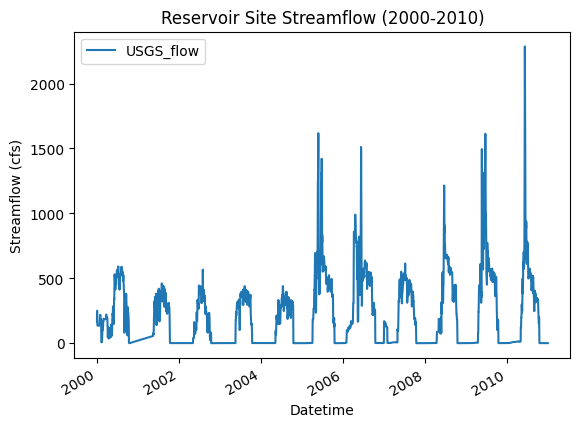

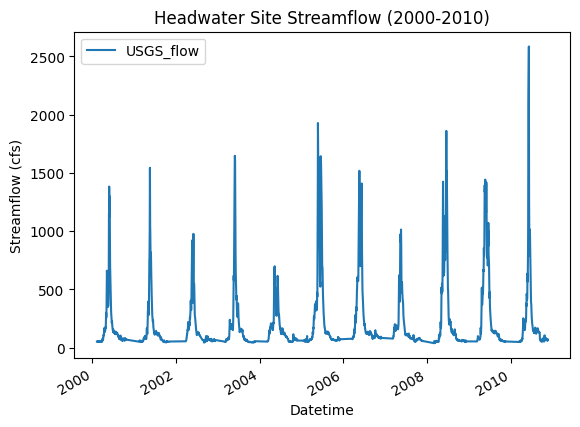

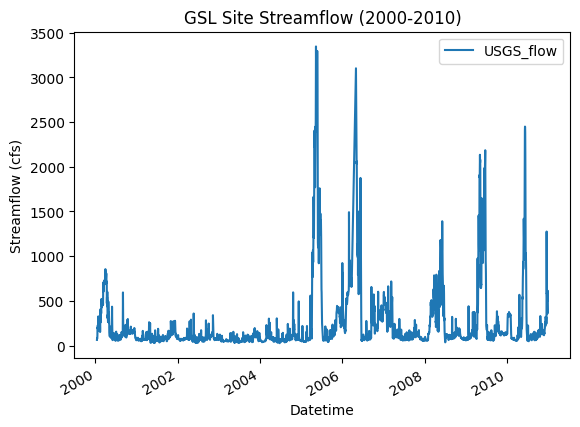

In [88]:
sliced_reservoir_site.plot(y='USGS_flow', title='Reservoir Site Streamflow (2000-2010)', ylabel='Streamflow (cfs)')
plt.show()
slicedheadwater_site.plot(y='USGS_flow', title='Headwater Site Streamflow (2000-2010)', ylabel='Streamflow (cfs)')
plt.show()
sliced_GSL_site.plot(y='USGS_flow', title='GSL Site Streamflow (2000-2010)', ylabel='Streamflow (cfs)')
plt.show()

## Task 4: Join/Merge Pandas DataFrames

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Hint, set your index to the date. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus). Print the dataframe.head() to demonstrate that is complete.

In [96]:
all_streams = pd.merge(sliced_reservoir_site, slicedheadwater_site, left_index=True, right_index=True, how='outer')
all_streams = pd.merge(all_streams, sliced_GSL_site, left_index=True, right_index=True, how='outer')

#doing dropna because my dates are mismatched

all_streams.rename(columns={'USGS_flow_x':'Reservoir Site', 'USGS_flow_y':'Headwater Site', 'USGS_flow':'GSL Site'}, inplace=True)
print(all_streams.columns.tolist())

['Reservoir Site', 'Headwater Site', 'GSL Site']


## Task 5: Demonstrate your Prowess with Matplotlib

Create a Four separate figures with all three stream on them:

* Figure 1 should be a single plot with all three stream  monitoring locations
* Figure 2 should be a single figure with subplots for each stream monitoring location. The subplots should be 2 rows and 2 columns
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 3 rows and 1 column 
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 1 row and 3 columns

Make sure your plots have the correct axes, labeled axes, a title, a legend. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus).

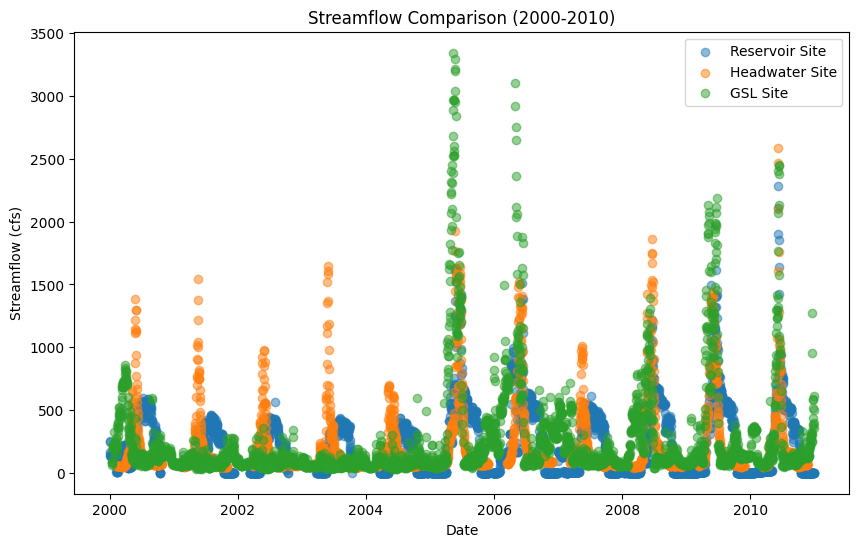

In [98]:
#Figure 1
plt.figure(figsize=(10,6))
plt.scatter(all_streams.index, all_streams['Reservoir Site'], label='Reservoir Site', alpha=0.5)
plt.scatter(all_streams.index, all_streams['Headwater Site'], label='Headwater Site', alpha=0.5)
plt.scatter(all_streams.index, all_streams['GSL Site'], label='GSL Site', alpha=0.5)
plt.title('Streamflow Comparison (2000-2010)')
plt.xlabel('Date')
plt.ylabel('Streamflow (cfs)')
plt.legend(all_streams.columns)
plt.show()

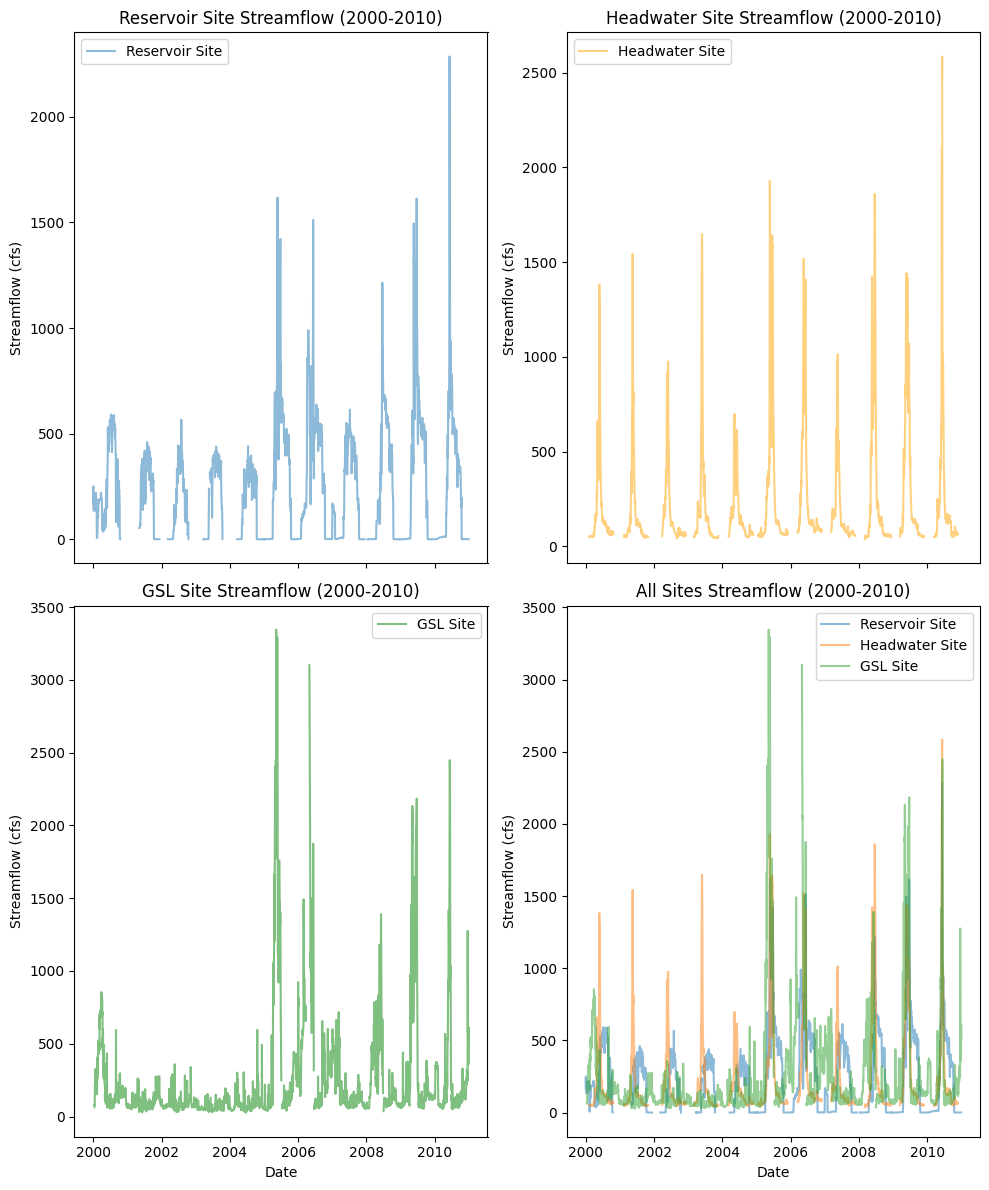

In [101]:
#Figure 2
fig, axs = plt.subplots(2, 2, figsize=(10, 12), sharex=True)
axs[0, 0].plot(all_streams.index, all_streams['Reservoir Site'], label='Reservoir Site', alpha=0.5)
axs[0, 0].set_title('Reservoir Site Streamflow (2000-2010)')
axs[0, 0].set_ylabel('Streamflow (cfs)')
axs[0, 0].legend()
axs[0, 1].plot(all_streams.index, all_streams['Headwater Site'], label='Headwater Site', color='orange', alpha=0.5)
axs[0, 1].set_title('Headwater Site Streamflow (2000-2010)')
axs[0, 1].set_ylabel('Streamflow (cfs)')
axs[0, 1].legend()
axs[1, 0].plot(all_streams.index, all_streams['GSL Site'], label='GSL Site', color='green', alpha=0.5)
axs[1, 0].set_title('GSL Site Streamflow (2000-2010)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Streamflow (cfs)')
axs[1, 0].legend()
axs[1, 1].plot(all_streams.index, all_streams['Reservoir Site'], label='Reservoir Site', alpha=0.5)
axs[1, 1].plot(all_streams.index, all_streams['Headwater Site'], label='Headwater Site', alpha=0.5)
axs[1, 1].plot(all_streams.index, all_streams['GSL Site'], label='GSL Site', alpha=0.5)
axs[1, 1].set_title('All Sites Streamflow (2000-2010)')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Streamflow (cfs)')
axs[1, 1].legend()
plt.tight_layout()
plt.show()

